In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from helper import *
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import random

In [2]:
def load_data():
    X = np.load("data/X.npy")
    y = np.load("data/y.npy")
    return split_data(X, y)

In [3]:
def split_data(X, y, train_size = 0.7):
    """
    Return a dictionary containing the traning set, validation set and the test set
    """
    X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, train_size=train_size)
    X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, train_size=0.5)
    data = {"train": (X_train, y_train), "val": (X_val, y_val), "test": (X_test, y_test)}
    return data

In [4]:
def create_nn():
    # Since each image is 20 by 20, the input is 400
    tf.random.set_seed(1234)
    model = Sequential(
        [
            tf.keras.Input(shape=(400,)),
            Dense(25, activation = 'relu', name = 'layer1'),
            Dense(15, activation = 'relu', name = 'layer2'),
            Dense(10, activation = 'linear', name = 'layer3')
        ], name = "nn_model")
    return model

In [5]:
def select_model(data, learning_rate, epochs):
    best_acc = 0
    best_epoch = 0
    best_lr = 0
    best_model = None

    for epoch in epochs:
        for l in learning_rate:
            model = create_nn()
            model.compile(
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam(learning_rate=l),
            )
            model.fit(
                data['train'][0], data['train'][1],
                epochs=epoch
            )
            train_prediction, train_acc = predict(model, data['train'][0], data['train'][1])
            # print("epochs: {}, learning rate: {}, train_acc: {}".format(epoch, l, train_acc))
            train_prediction, val_acc = predict(model, data['val'][0], data['val'][1])
            # print("epochs: {}, learning rate: {}, val_acc: {}".format(epoch, l, val_acc))

            if val_acc > best_acc:
                best_acc = val_acc
                best_epoch = epoch
                best_lr = l
                best_model = model

    print("best epochs: {}, best learning rate: {}".format(best_epoch, best_lr))

    return best_model

In [6]:
def predict(model, X, y):
    m, n = X.shape
    prediction = model.predict(X.reshape(-1, 400))
    # if you need a probability output then use prediction = tf.nn.softmax(prediction)
    prediction = np.argmax(prediction, axis = 1)
    prediction = prediction.reshape(m, 1)
    accuracy = np.sum((prediction == y) / m)

    return prediction, accuracy

In [7]:
# The data contains 5000 examples of handwritten digits. Each example is a 20 pixel by 20 pixel grayscale image
# Each 20 by 20 image is unrolled into a 400 dimensional vector.
data = load_data()

# learning_rate = [0.001, 0.01, 0.05]
# epochs = [10, 25, 40, 60]
learning_rate = [0.001]
epochs = [40]
best_model = select_model(data, learning_rate, epochs)

# random_idx = random.sample(range(0, len(data['test'][0])), 10)
# example = data['test'][1][random_idx]
# ex_pred, acc = predict(best_model, data['test'][0], data['test'][1])
# print(example.T)
# print(ex_pred[random_idx].T)

2022-08-05 01:55:15.114100: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-05 01:55:15.114530: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 3500 samples
Epoch 1/40
3500/3500 [==============================] - 1s 201us/sample - loss: 1.8733
Epoch 2/40
3500/3500 [==============================] - 0s 79us/sample - loss: 1.0186
Epoch 3/40
3500/3500 [==============================] - 0s 91us/sample - loss: 0.5451
Epoch 4/40
3500/3500 [==============================] - 0s 74us/sample - loss: 0.4098
Epoch 5/40
3500/3500 [==============================] - 0s 70us/sample - loss: 0.3458
Epoch 6/40
3500/3500 [==============================] - 0s 71us/sample - loss: 0.3016
Epoch 7/40
3500/3500 [==============================] - 0s 70us/sample - loss: 0.2732
Epoch 8/40
3500/3500 [==============================] - 0s 69us/sample - loss: 0.2469
Epoch 9/40
3500/3500 [==============================] - 0s 69us/sample - loss: 0.2238
Epoch 10/40
3500/3500 [==============================] - 0s 67us/sample - loss: 0.2069
Epoch 11/40
3500/3500 [==============================] - 0s 68us/sample - loss: 0.1880
Epoch 12/40
3500/3500 [======

In [10]:
train_prediction, train_acc = predict(best_model, data['train'][0], data['train'][1])
print("train_acc: {:.4f}".format(train_acc))

train_prediction, val_acc = predict(best_model, data['val'][0], data['val'][1])
print("val_acc: {:.4f}".format(val_acc))

test_prediction, test_acc = predict(best_model, data['test'][0], data['test'][1])
print("test_acc: {:.4f}".format(test_acc))

train_acc: 0.9980
val_acc: 0.9347
test_acc: 0.9227


58 errors out of 750 images in test set


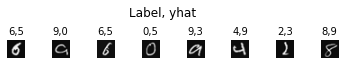

In [9]:
print(f"{display_errors(best_model, data['test'][0], data['test'][1])} errors out of {len(data['test'][0])} images in test set")
plt.show()